# Notebook for testing LCA calculations

Log
2025-05-12: initial version

We first define the function we want to test

In [3]:
import os
print(os.getcwd())

c:\Users\EmmaFrom\Work Folders\Documents\GitHub\rurut\LCC\rurut\LCC\rals_livslangd_python\notebooks


In [5]:
def new_func():
    import sys
    sys.path.append('../')  # Justera om det behövs

    from rail_analysis.LCA import get_LCA_renewal

    # Call the function get_LCA_renewal
    track_length = 1000
    asset_type = 'Track'
    year = 2025
    share_electricity = 0.8
    circularity_coefficient = 0.2

    result = get_LCA_renewal(track_length, asset_type, year, share_electricity, circularity_coefficient)
    print(result)

new_func()

19655.134434820935


Expand code to include year and share of electricity

In [6]:
import pandas as pd

def get_LCA_renewal (track_length, asset_type, year, share_electricity=1.0, circularity_coeff=0.0):

    # Emissionfactors kg Co2e per MJ 
    EF_ELECTRICITY = 0.006464924
    EF_DIESEL = 0.063583815

    # Read LCA-data och CO2e-valuation
    lca = pd.read_csv('../data/raw/LCA/lca_base_data.csv', delimiter=';', encoding='utf-8')
    co2e = pd.read_csv('../data/raw/LCA/co2_valuation.csv', delimiter=';', encoding='utf-8')
    print(co2e.columns.tolist())


    # Convert commas to dots
    lca['CO2 emissions_kg/m'] = lca['CO2 emissions_kg/m'].str.replace(',', '.').astype(float)
    lca['Energy use_MJ_m'] = lca['Energy use_MJ_m'].str.replace(',', '.').astype(float)
    co2e['CO2_Valuation (kr/kg Co2e)'] = co2e['CO2_Valuation (kr/kg Co2e)'].str.replace(',', '.').astype(float)

    # filter asset
    row = lca[lca['Asset'] == asset_type].iloc[0]
    co2_emission = row['CO2 emissions_kg/m']  # kg/m
    energy_use = row['Energy use_MJ_m']       # MJ/m

    # get co2e valuation for year 
    co2_price = co2e[co2e['Year'] == year]['CO2_Valuation (kr/kg Co2e)'].values[0]

    #convert energy use to co2e - emissions 
    emission_factor = share_electricity * EF_ELECTRICITY + (1 - share_electricity) * EF_DIESEL
    energy_co2 = energy_use * emission_factor  # kg/m

    #total co2e per meter 
    total_co2_per_m = co2_emission + energy_co2  # kg/m

    # Adjust for circularity (reduction from reuse/recycling))
    adjusted_co2_per_m = total_co2_per_m * (1 - circularity_coefficient)


    #total cost 
    total_cost = adjusted_co2_per_m * co2_price * track_length  # SEK

    return total_cost

# test 

track_length = 1000                # in meter
asset_type = 'Track'              # or 'Rail'
year = 2025
share_electricity = 0.8           # 80% el, 20% diesel
circularity_coefficient = 0.2     # 20% circularity

# Anropa funktionen
cost = get_LCA_renewal(track_length, asset_type, year, share_electricity, circularity_coefficient)

# Skriv ut resultatet
print(
    f"Total LCA renewal cost for {asset_type} in year {year} "
    f"with {share_electricity*100:.0f}% electricity and {circularity_coefficient*100:.0f}% circularity: "
    f"{cost:.2f} SEK"
)




['Year', 'CO2_Valuation (kr/kg Co2e)']
Total LCA renewal cost for Track in year 2025 with 80% electricity and 20% circularity: 19655.13 SEK


Test call function from module 

In [7]:
from rail_analysis.LCA import get_LCA_renewal

track_length = 1000
asset_type = 'Track'
year = 2025
share_electricity = 0.8
circularity_coefficient = 0.2

cost = get_LCA_renewal(track_length, asset_type, year, share_electricity, circularity_coefficient)
print(cost)

19655.134434820935


Visualization

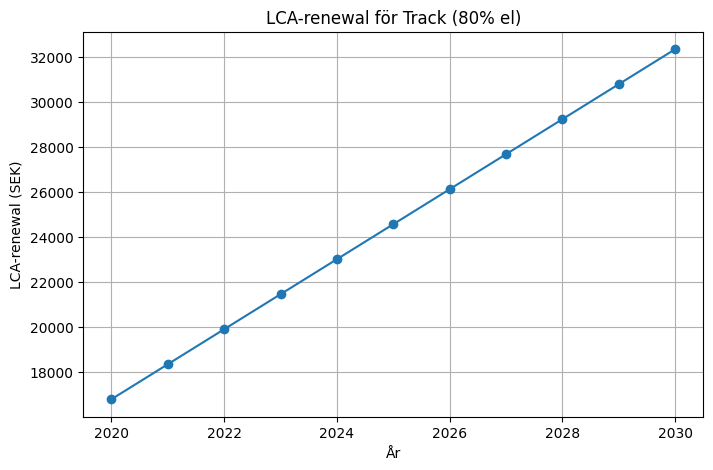

In [8]:
import matplotlib.pyplot as plt

years = list(range(2020, 2031))
costs = [get_LCA_renewal(track_length, asset_type, year, share_electricity) for year in years]

plt.figure(figsize=(8,5))
plt.plot(years, costs, marker='o')
plt.xlabel('År')
plt.ylabel('LCA-renewal (SEK)')
plt.title(f'LCA-renewal för {asset_type} ({share_electricity*100:.0f}% el)')
plt.grid(True)
plt.show()


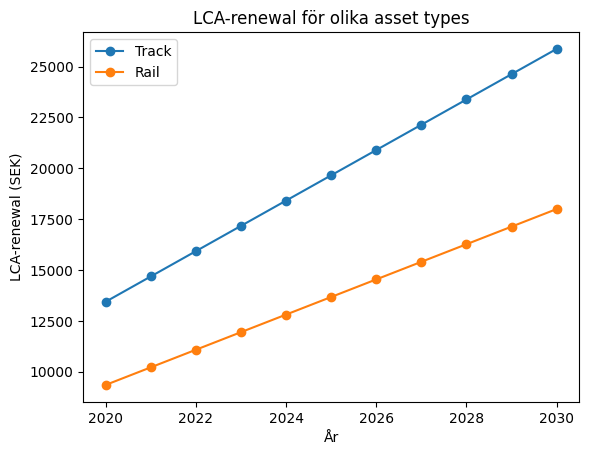

In [10]:
asset_types = ['Track', 'Rail']
for asset in asset_types:
    costs = [get_LCA_renewal(track_length, asset, year, share_electricity, circularity_coefficient) for year in years]
    plt.plot(years, costs, marker='o', label=asset)
plt.xlabel('År')
plt.ylabel('LCA-renewal (SEK)')
plt.legend()
plt.title('LCA-renewal för olika asset types')
plt.show()

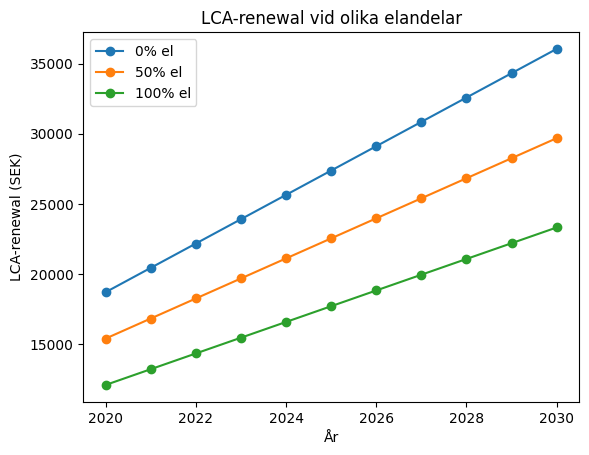

In [11]:
shares = [0.0, 0.5, 1.0]
for share in shares:
    costs = [get_LCA_renewal(track_length, asset_type, year, share, circularity_coefficient) for year in years]
    plt.plot(years, costs, marker='o', label=f'{int(share*100)}% el')
plt.xlabel('År')
plt.ylabel('LCA-renewal (SEK)')
plt.legend()
plt.title('LCA-renewal vid olika elandelar')
plt.show()

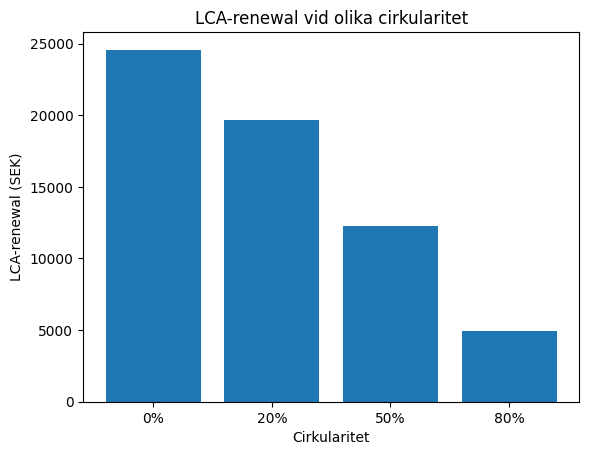

In [12]:
import numpy as np
circularities = [0.0, 0.2, 0.5, 0.8]
costs = [get_LCA_renewal(track_length, asset_type, year, share_electricity, circ) for circ in circularities]
plt.bar([f'{int(c*100)}%' for c in circularities], costs)
plt.xlabel('Cirkularitet')
plt.ylabel('LCA-renewal (SEK)')
plt.title('LCA-renewal vid olika cirkularitet')
plt.show()

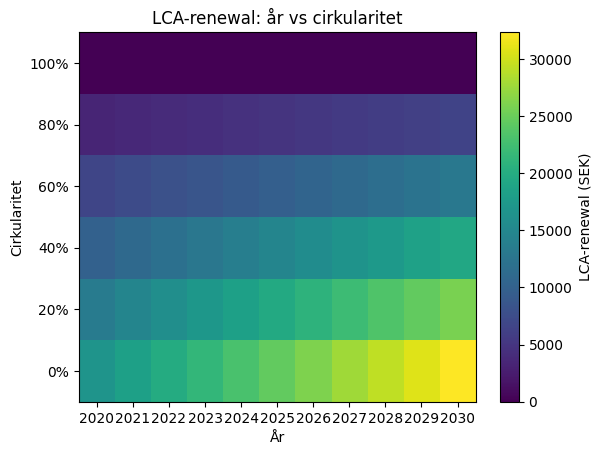

In [13]:
import numpy as np
circularities = np.linspace(0, 1, 6)
cost_matrix = np.array([[get_LCA_renewal(track_length, asset_type, year, share_electricity, circ)
                         for year in years] for circ in circularities])
plt.imshow(cost_matrix, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='LCA-renewal (SEK)')
plt.xticks(ticks=range(len(years)), labels=years)
plt.yticks(ticks=range(len(circularities)), labels=[f'{int(c*100)}%' for c in circularities])
plt.xlabel('År')
plt.ylabel('Cirkularitet')
plt.title('LCA-renewal: år vs cirkularitet')
plt.show()

Abdous code LCA.py

In [ ]:

##Abdou's code 
    # read LCA data from a CSV file
    lca_data = pd.read_csv('../data/raw/LCA/LCA_indata.csv', delimiter=';', encoding='utf-8')
    # replace ',' with '.' in the 'Costs' column
    lca_data['Costs'] = lca_data['Costs'].str.replace(',', '.').astype(float)


    # Calculate the total renewal costs
    total_LCA_cost = lca_data[lca_data['Asset'] == asset_type]['Costs'] * track_length

    # return only the value
    total_LCA_cost = total_LCA_cost.values[0]
    return total_LCA_cost